In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore", append=False)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,NaN,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,NaN,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,NaN,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,NaN,0,L,1,G,X,X,X,16.0,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182190 entries, 0 to 182189
Columns: 481 entries, date to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 668.6+ MB


In [6]:
df.describe()

,date,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2
count,182190.000000,182190.000000,182190.000000,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,...,182190.000000,163192.000000,163192.000000,182190.000000,182190.000000,182190.000000,9249.000000,182190.000000,182190.000000,181940.000000
mean,9141.343746,54.011032,2726.705170,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,0.058940,...,9135.616422,9151.115594,8.097468,13.334883,91094.500000,0.050766,26.550695,0.501032,1.910039,31.542470
std,343.435045,944.160699,2132.260681,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,0.261593,...,320.480755,294.266119,8.296798,10.657192,52593.867109,0.219519,21.134328,0.500000,1.073082,18.763625
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,0.000000,0.000000,1.700000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.400000,45547.250000,0.000000,17.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2611.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.647059,91094.500000,0.000000,22.100000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.500000,136641.750000,0.000000,34.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,182189.000000,1.000000,340.000000,1.000000,4.000000,62.000000


In [7]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
outliers

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
254,9501,TVH,1,CA,90068,,,5101,0,,...,93.5,0,L,1,G,X,X,X,8.0,A
1755,8801,AHC,0,CO,81501,,,1602,0,X,...,170.0,1,L,1,G,X,X,X,13.0,C
3574,8601,FIG,0,WA,98103,,,803,0,X,...,173.4,0,L,4,G,L,2,C,10.0,A
9284,8801,STK,1,TX,75243,,,5001,0,X,...,170.0,1,L,1,G,I,1,C,9.0,A
9984,8701,ASC,1,IL,60467,,,0,0,X,...,170.0,1,L,1,G,C,1,C,5.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161177,9501,MCO,1,CA,94541,,,0,0,,...,170.0,0,L,2,G,X,X,X,31.0,A
163559,8601,FOR,0,MI,48207,,,801,0,,...,170.0,0,L,4,G,X,X,X,47.0,A
164735,8801,STK,1,TX,75243,,,5001,0,X,...,170.0,1,L,1,G,I,1,C,9.0,A
168128,8801,AHC,0,CO,81501,,,1602,0,X,...,170.0,1,L,1,G,X,X,X,13.0,C


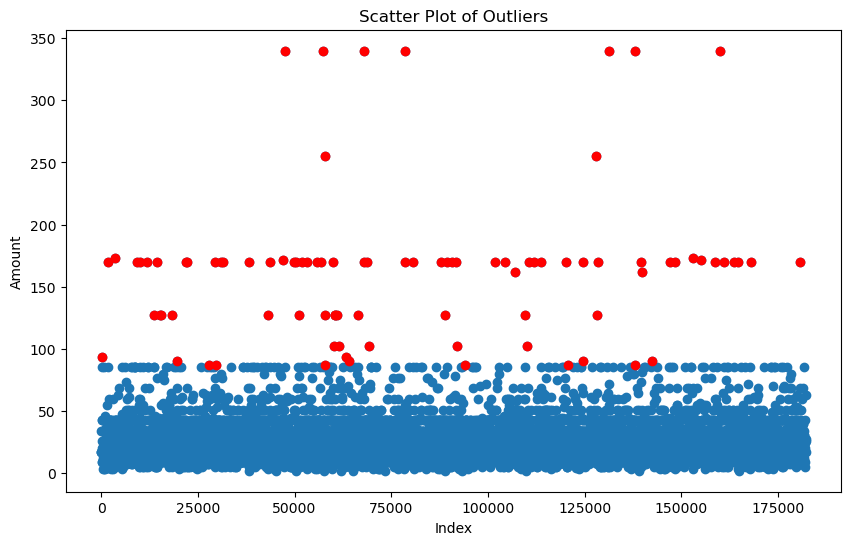

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df.index, y=df['amount'])
plt.scatter(x=outliers.index, y=outliers['amount'], color='red', label='Outliers')
plt.title('Scatter Plot of Outliers')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.show()

In [9]:
#Confirming if any responded line item has no amount (0 means False and good to go)
df['responded'][df['amount'].isna()].sum()

0

In [10]:
# Then we can replace nan in amount with 0
df.loc[:, 'amount'] = df['amount'].fillna(0)

In [11]:
df

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,0.0,0,L,1,G,X,X,X,16.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182185,9401,SYN,0,TN,37422,,,3401,0,,...,0.0,0,L,1,F,X,X,X,23.0,B
182186,9601,MBC,1,IN,46530,,,5401,0,,...,0.0,1,L,1,G,X,X,X,4.0,B
182187,9201,ENQ,2,FL,33021,,,1601,0,,...,0.0,0,L,1,E,X,X,X,19.0,A
182188,9601,L02,28,IL,60426,,,4401,0,,...,0.0,0,L,1,G,X,X,X,26.0,A


### DIMENSIONALITY REDUCTION (PCA)

In [12]:
#The following variables reflect characteristics of the customers neighborhood,  collected from the 1990 US Census.

pop_cols = df.loc[:, 'pop901':'ac2'].columns.tolist()
pop_df = df.loc[:, 'pop901':'ac2']
df.drop(pop_cols, axis=1, inplace=True)

In [13]:
pop_df.columns[pop_df.isna().any()].tolist()

['msa', 'adi', 'dma']

In [14]:
pop_df = pop_df.drop(['msa', 'adi', 'dma'], axis=1)

In [15]:
selected_features = pop_df.columns.tolist()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler1 = StandardScaler()
pop_df_scaled = scaler1.fit_transform(pop_df)

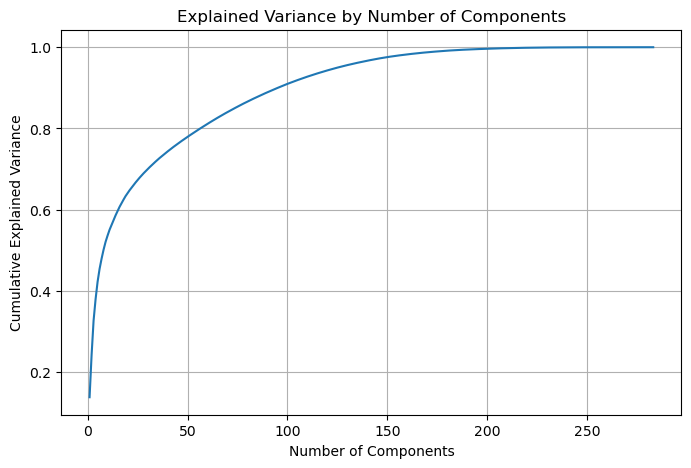

In [17]:
pca = PCA().fit(pop_df_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [18]:
pca = PCA(n_components=150)
principalComponents = pca.fit_transform(pop_df_scaled)

pcadf = pd.DataFrame(data=principalComponents,
                              columns=[f'pc{i+1}' for i in range(150)])


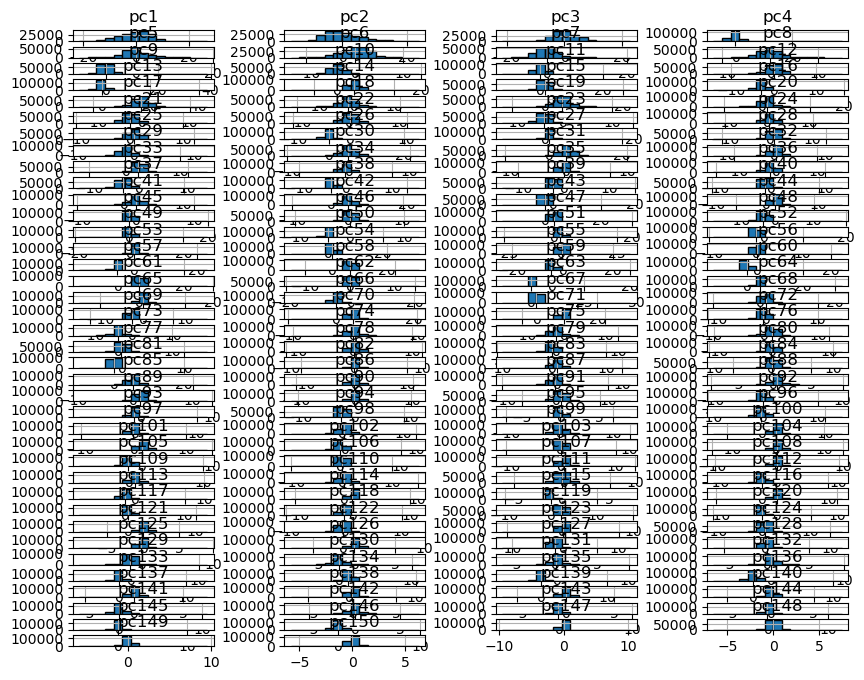

In [19]:
pcadf.hist(figsize=(10, 8), bins=15, layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [20]:
#The fields listed below are from the promotion history file. 
#Instead - We shall use the summary variables from the promotion history file for time being. 

prom_cols = df.loc[:, 'adate_2':'rfa_24'].columns.tolist()
df.drop(prom_cols, axis=1, inplace=True)

In [21]:
#The following fields are from the giving history file.
#Instead - We shall use the summary variables from the giving history file for time being. .

hist_cols = df.loc[:, 'rdate_3':'ramnt_24'].columns.tolist()
df.drop(hist_cols, axis=1, inplace=True)
df

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,0.0,0,L,1,G,X,X,X,16.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182185,9401,SYN,0,TN,37422,,,3401,0,,...,0.0,0,L,1,F,X,X,X,23.0,B
182186,9601,MBC,1,IN,46530,,,5401,0,,...,0.0,1,L,1,G,X,X,X,4.0,B
182187,9201,ENQ,2,FL,33021,,,1601,0,,...,0.0,0,L,1,E,X,X,X,19.0,A
182188,9601,L02,28,IL,60426,,,4401,0,,...,0.0,0,L,1,G,X,X,X,26.0,A


In [22]:
# Coloumns doesnt seem to be any relevant here

df = df.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1)

In [23]:
dt = pd.read_csv('data - types.csv')
dt.head()

,Column Name,Data Type,Description
0,date,Date,Origin Date. Date of customer's first gift to ...
1,source,Nominal,Origin Source - (Only 1st 3 bytes are used) - ...
2,title,Nominal,"Customer title code (e.g., 000 = _, 001 = MR.,..."
3,state,Nominal,State abbreviation (a nominal/symbolic field)
4,zip,Nominal,Zipcode (a nominal/symbolic field)


In [24]:
num_columns = dt[dt['Data Type'].isin(['Discrete', 'Continuous','Ordinal'])]['Column Name']
num_df = df[num_columns]

In [25]:
for column in num_df.columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
#    print(num_df[column].head())
    print()


Column Name: age, Description: Overlay Age (0 = missing)

Column Name: numchld, Description: Number of Children

Column Name: income_range, Description: Household income range

Column Name: wealth1, Description: Wealth Rating

Column Name: hit, Description: MOR Flag # hit (Mail Order Response). Indicates total number of known times the customer has responded to a mail order offer other than ACE's.

Column Name: mbcraft, Description: Buy Craft Hobby

Column Name: mbgarden, Description: Buy Gardening

Column Name: mbbooks, Description: Buy Books

Column Name: mbcolect, Description: Buy Collectables

Column Name: magfaml, Description: Buy General Family Mags

Column Name: magfem, Description: Buy Female Mags

Column Name: magmale, Description: Buy Sports Mags

Column Name: pubgardn, Description: Gardening Pubs

Column Name: pubculin, Description: Culinary Pubs

Column Name: pubhlth, Description: Health Pubs

Column Name: pubdoity, Description: Do It Yourself Pubs

Column Name: pubnewfn, D

In [26]:
num_df.describe()

,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,...,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift
count,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,81303.000000,81192.000000,81303.000000,...,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,163192.000000,182190.000000
mean,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,0.058940,1.114719,0.064157,0.447388,...,5.349333,12.859065,104.465347,9.601932,5.057819,7.921269,19.983080,17.294422,8.097468,13.334883
std,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,0.261593,1.667029,0.297601,0.819394,...,1.220220,4.548855,118.732713,8.553655,4.524780,8.653835,25.268966,13.809306,8.296798,10.657192
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.285714
25%,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,11.000000,40.000000,3.000000,2.000000,3.000000,14.000000,10.000000,4.000000,8.400000
50%,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,12.000000,78.000000,7.000000,4.000000,5.000000,17.000000,15.000000,6.000000,11.647059
75%,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,6.000000,13.000000,131.000000,13.000000,7.000000,10.000000,23.000000,20.000000,11.000000,15.500000
max,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,9.000000,6.000000,9.000000,...,19.000000,78.000000,9485.000000,237.000000,41.000000,1000.000000,5000.000000,1000.000000,1088.000000,1000.000000


### NUMERICAL VARIABLE DATA HANDLING (IMPUTATION)

In [27]:
coloumns_to_impute = ['age', 'income_range','wealth1','wealth2']
df.loc[:, coloumns_to_impute] = df[coloumns_to_impute].fillna(df[coloumns_to_impute].mean())

coloumns_to_fillna = ['numchld','nextdate', 'timelag']
df[coloumns_to_fillna] = df[coloumns_to_fillna].fillna(0)

coloumns_to_drop = ['mbcraft', 'mbgarden', 'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale','pubgardn', 'pubculin', 'pubhlth','pubdoity','pubnewfn', 'pubphoto', 'pubopp']
df.drop(coloumns_to_drop, axis=1, inplace=True)

df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,0.0,0,L,1,G,X,X,X,16.0,C


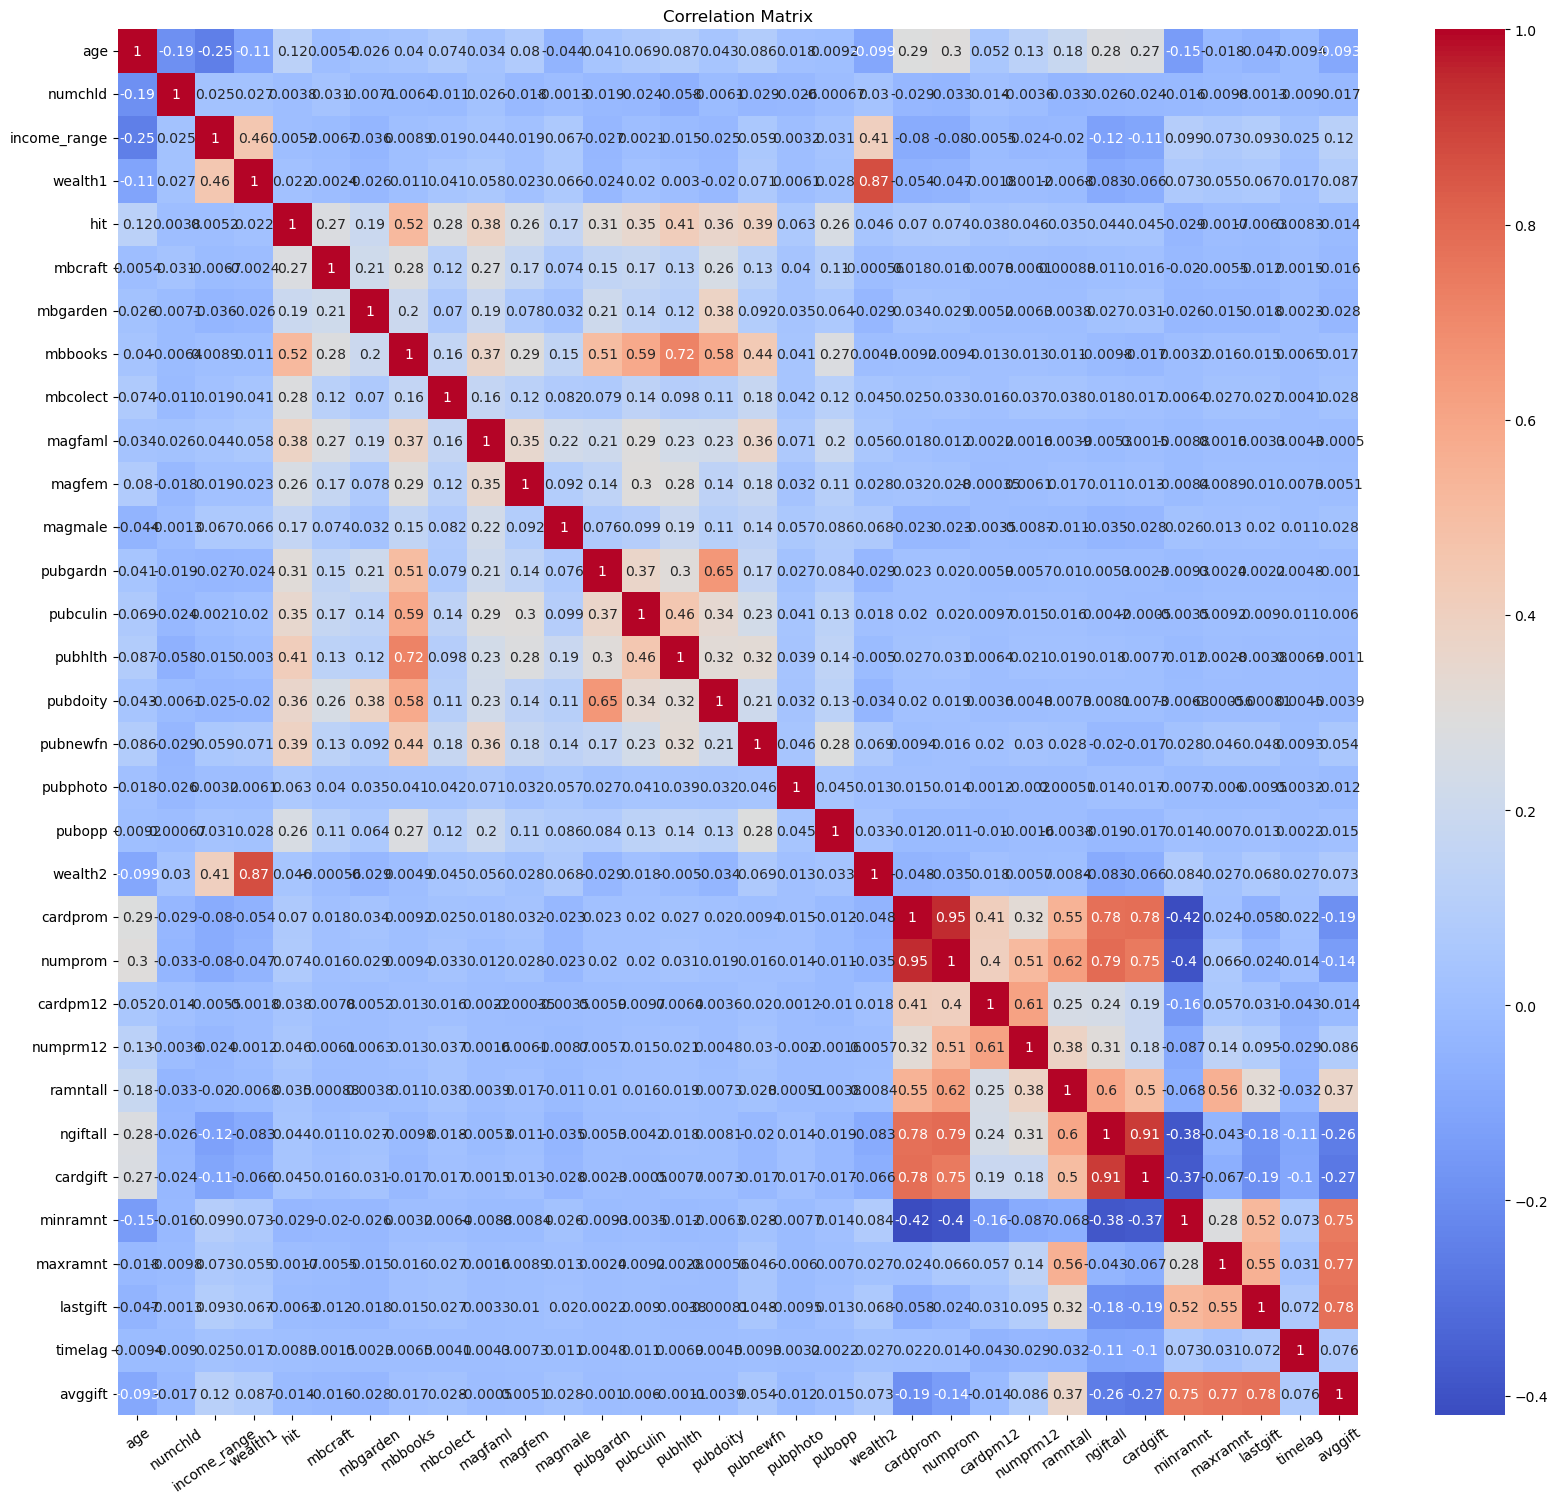

In [28]:
num_df.corr()
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35)
plt.title('Correlation Matrix')
plt.show()

In [29]:
coloumns_multicol = ['cardprom','avggift','cardgift']
df.drop(coloumns_multicol, axis=1, inplace=True)

### CATEGORICAL VARIABLE DATA HANDLING ( ONE-HOT ENCODING)

In [30]:
catn_columns = dt[dt['Data Type'].isin(['Nominal','Binary'])]['Column Name']
catn_columns
catn_df = df[catn_columns]

In [31]:
for column in catn_df:
    unique_items = df[column].nunique()
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Unique Items: {unique_items}")
    print()

Column Name: source, Unique Items: 896

Column Name: title, Unique Items: 56

Column Name: state, Unique Items: 57

Column Name: zip, Unique Items: 19986

Column Name: mailcode, Unique Items: 2

Column Name: has_chapter, Unique Items: 3

Column Name: noexch, Unique Items: 6

Column Name: recinhse, Unique Items: 2

Column Name: recp3, Unique Items: 2

Column Name: recpgvg, Unique Items: 2

Column Name: recsweep, Unique Items: 2

Column Name: mdmaud, Unique Items: 28

Column Name: domain, Unique Items: 17

Column Name: cluster, Unique Items: 54

Column Name: ageflag, Unique Items: 3

Column Name: homeownr, Unique Items: 3

Column Name: child03, Unique Items: 4

Column Name: child07, Unique Items: 4

Column Name: child12, Unique Items: 4

Column Name: child18, Unique Items: 4

Column Name: gender, Unique Items: 7

Column Name: datasrce, Unique Items: 4

Column Name: solp3, Unique Items: 5

Column Name: solih, Unique Items: 8

Column Name: major, Unique Items: 2

Column Name: geocode, Uniq

In [32]:
coloumns_cat_drop = [ 'zip', 'source']#,'state', 'domain', 'cluster', 'cluster2','title']
################### above line might have info
catn_df.drop(coloumns_cat_drop, axis=1, inplace=True)
df.drop(coloumns_cat_drop, axis=1, inplace=True)
df.head()

,date,title,state,mailcode,has_chapter,dob,noexch,recinhse,recp3,recpgvg,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,0,KY,,,6901,0,,,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,2,MI,,,4101,0,,,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,28,WA,,,0,0,,,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,2,NM,B,,5201,0,,,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,0,AL,,,4301,0,,,,...,0.0,0,L,1,G,X,X,X,16.0,C


In [33]:
# One-hot encode the specified columns and drop the original columns
df = pd.get_dummies(df, columns=catn_df.columns, drop_first=True)
df.head()

,date,dob,age,numchld,income_range,wealth1,hit,wealth2,maxadate,numprom,...,cluster2_57.0,cluster2_58.0,cluster2_59.0,cluster2_60.0,cluster2_61.0,cluster2_62.0,geocode2_A,geocode2_B,geocode2_C,geocode2_D
0,9101,6901,29.000000,0.0,3.000000,9.000000,0,9.000000,9702,56,...,False,False,False,False,False,False,False,True,False,False
1,8601,4101,57.000000,2.0,2.000000,5.349063,0,4.953185,9702,51,...,False,False,False,False,False,False,False,True,False,False
2,9601,0,61.593722,0.0,3.886129,5.349063,0,4.953185,9702,20,...,False,False,False,False,False,False,False,True,False,False
3,9101,5201,46.000000,0.0,3.000000,5.349063,0,4.953185,9702,51,...,False,False,False,False,False,False,False,False,True,False
4,9201,4301,55.000000,0.0,3.886129,5.349063,0,8.000000,9702,49,...,False,False,False,False,False,False,False,False,True,False


In [34]:
date_columns = dt[dt['Data Type'].isin(['Date'])]['Column Name']
date_columns

0         date
7          dob
69    maxadate
77    minrdate
79    maxrdate
81    lastdate
82    fistdate
83    nextdate
Name: Column Name, dtype: object

In [35]:
for column in date_columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
#    print(df[column].head())
    print()

Column Name: date, Description: Origin Date. Date of customer's first gift to ACE YYMM format (Year/Month).

Column Name: dob, Description: Date of birth (YYMM, Year/Month format.)

Column Name: maxadate, Description: Date of the most recent promotion received (in YYMM, Year/Month format)

Column Name: minrdate, Description: Date associated with the smallest gift to date

Column Name: maxrdate, Description: Date associated with the largest gift to date

Column Name: lastdate, Description: Date associated with the most recent gift

Column Name: fistdate, Description: Date of first gift

Column Name: nextdate, Description: Date of second gift



In [36]:
df['dob'].value_counts().get(0, 0)
df['dob'] = df['dob'].replace(0, np.nan).fillna(df['dob'].replace(0, np.nan).mean())

In [37]:
df = pd.concat([df,pcadf],axis=1)

In [38]:
df.drop(['noexch_1'], axis=1, inplace=True)

In [39]:
scaler2 = StandardScaler()
df.update(pd.DataFrame(scaler2.fit_transform(df.drop(['responded', 'amount','id'], axis=1)), columns=df.drop(['responded', 'amount','id'], axis=1).columns, index=df.index))

In [40]:
df.describe()

,date,dob,age,numchld,income_range,wealth1,hit,wealth2,maxadate,numprom,...,pc141,pc142,pc143,pc144,pc145,pc146,pc147,pc148,pc149,pc150
count,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,...,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05
mean,2.401723e-15,-2.842912e-16,-1.636210e-15,2.586681e-17,-6.754817e-17,-8.434551e-16,8.648271e-18,8.479011e-16,-1.154185e-13,-1.487854e-16,...,-5.245513e-18,1.794004e-18,-1.341603e-17,1.716004e-18,-9.360023e-19,-1.911005e-18,9.759774e-18,-1.684804e-17,1.647754e-17,1.326003e-18
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.432326e+00,-2.499104e+00,-4.192145e+00,-3.361477e-01,-1.765441e+00,-2.675443e+00,-3.589622e-01,-2.402957e+00,-1.635211e+01,-1.870723e+00,...,-9.052491e+00,-1.337505e+01,-1.472971e+01,-1.743154e+01,-1.093281e+01,-1.138503e+01,-1.976067e+01,-1.368690e+01,-1.234441e+01,-1.254357e+01
25%,-9.910016e-01,-7.012805e-01,-6.637366e-01,-3.361477e-01,-5.420439e-01,-1.745911e-01,-3.589622e-01,8.617706e-16,6.378826e-02,-8.697148e-01,...,-5.924610e-01,-5.561495e-01,-5.456674e-01,-5.327673e-01,-5.559503e-01,-5.701035e-01,-5.200219e-01,-5.666179e-01,-5.807438e-01,-5.574190e-01
50%,1.737051e-01,-3.137204e-16,-1.474756e-15,-3.361477e-01,0.000000e+00,-8.884810e-16,-3.589622e-01,8.617706e-16,6.378826e-02,7.273990e-04,...,-1.148532e-02,8.420768e-03,-1.179629e-02,2.135218e-02,-1.359688e-02,3.448963e-03,1.794928e-02,5.527937e-04,9.083951e-03,-9.140183e-03
75%,1.047235e+00,6.743369e-01,6.507683e-01,-3.361477e-01,6.813529e-01,3.255793e-01,-3.408810e-02,2.271164e-02,6.378826e-02,7.406033e-01,...,5.788880e-01,5.811756e-01,5.533515e-01,5.258114e-01,5.408786e-01,5.631451e-01,5.357276e-01,5.610448e-01,5.865199e-01,5.622486e-01
max,1.629588e+00,4.198926e+00,2.518749e+00,1.153293e+01,1.904750e+00,1.826090e+00,2.573926e+01,1.963247e+00,6.378826e-02,6.442000e+00,...,2.026831e+01,1.343823e+01,1.884166e+01,2.393640e+01,2.547416e+01,1.958688e+01,2.125391e+01,1.568572e+01,2.024253e+01,1.354934e+01


In [41]:
df.responded.unique()

array([0, 1])

### CLASSIFICATION

In [42]:
X = df.drop(['amount', 'responded','id'], axis=1)
y = df[['responded']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [46]:
y.value_counts()

responded
0            172941
1              9249
Name: count, dtype: int64

In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# rf_model = RandomForestClassifier(random_state=42)
# param_grid = {'n_estimators': [100, 300], 
#               'max_depth': [None, 20], 
#               'min_samples_split': [2, 5]}

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall')
# grid_search.fit(X_train, y_train)
# print("Best param: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# #   n_estimators=300, min_samples_split=2, max_depth=None, min_samples_leaf=1

In [48]:
rf_order = X_train.columns.tolist()

In [49]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=300, class_weight='balanced', min_samples_split=2, max_depth=None, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[51878     4]
 [  947  1828]]


Recall: 0.6587387387387388
Accuracy: 0.9826005818101982
Precision: 0.9978165938864629
F1 Score: 0.7935749945734751


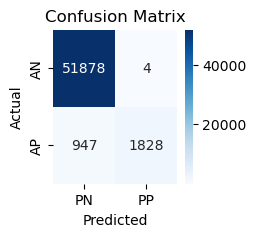

In [50]:
recall = recall_score(y_test, y_pred, average='binary') 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


plt.figure(figsize=(2,2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["PN", "PP"], yticklabels=["AN", "AP"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# no show predict
P(no show) = 1
p(do)




# hospital

# past appoitn - yes - came
# no - didnt appera


P(show)


FP predict show dont appear X

FN predict no show, appear X

SyntaxError: invalid syntax. Perhaps you forgot a comma? (312883571.py, line 2)

### REGRESSION

In [51]:
r_df = df[df['responded'] == 1]

In [52]:
X = r_df.drop(['amount', 'responded','id'], axis=1)
y = r_df[['amount']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))



mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"SVR MAPE: {mape}%")


SVR MAPE: 22.971102338834893%


In [56]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.001, 0.01, 0.1, 1],
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
# }

# grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train_scaled)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

### ANALYSIS AND OUTPUT

In [57]:
data_test = pd.read_csv('test.csv')
tester = data_test.copy()
tester.drop(['market'], axis=1, inplace=True)

In [58]:
pop_df_test = tester[pop_cols]
tester.drop(pop_cols, axis=1, inplace=True)
pop_df_test = pop_df_test.drop(['msa', 'adi', 'dma'], axis=1)

pop_df_test_scaled = scaler1.transform(pop_df_test)

principalComponents_test = pca.transform(pop_df_test_scaled)

pcadf_test = pd.DataFrame(data=principalComponents_test,
                          columns=[f'pc{i+1}' for i in range(150)])

tester.drop(prom_cols + hist_cols, axis=1, inplace=True)

In [59]:
tester.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1, inplace=True)
tester.loc[:, coloumns_to_impute] = tester[coloumns_to_impute].fillna(tester[coloumns_to_impute].mean())
tester[coloumns_to_fillna] = tester[coloumns_to_fillna].fillna(0)
tester.drop(coloumns_to_drop, axis=1, inplace=True)
tester.drop(coloumns_multicol, axis=1, inplace=True)
tester.drop(coloumns_cat_drop, axis=1, inplace=True)

In [60]:
tester = pd.get_dummies(tester, columns=catn_df.columns, drop_first=True)

In [61]:
tester['dob'] = tester['dob'].replace(0, np.nan).fillna(tester['dob'].replace(0, np.nan).mean())

In [62]:
tester = pd.concat([tester, pcadf_test], axis=1)

In [63]:
tester.drop(['noexch_1'], axis=1, inplace=True)

In [64]:
tester.update(pd.DataFrame(scaler2.fit_transform(tester.drop(['id'], axis=1)), columns=tester.drop(['id'], axis=1).columns, index=tester.index))

In [65]:
rf_order = list(X_train.columns)
missing_features = [feature for feature in rf_order if feature not in tester.columns]

for feature in missing_features:
    tester[feature] = 0

In [66]:
tester_align = tester.drop(['id'], axis=1)

In [67]:
tester_align = tester_align.reindex(columns=rf_order)

In [68]:
rf_predictions = rf_model.predict(tester_align)
rf_probab = rf_model.predict_proba(tester_align)[:, 1]

In [69]:
tester_features_scaled = scaler_X.transform(tester_align)

In [70]:
svr_predictions_scaled = svr_model.predict(tester_features_scaled)
svr_predictions = scaler_y.inverse_transform(svr_predictions_scaled.reshape(-1, 1)).flatten()

In [71]:
results_df = pd.DataFrame({
    'id': tester['id'],
    'rf_predicted_responded': rf_predictions,
    'rf_probability_responded': rf_probab,
    'svr_predicted_amount': svr_predictions
})

In [72]:
np.unique(rf_predictions, return_counts=True)

(array([0, 1]), array([9473,  116]))

In [73]:
data_test = data_test.merge(results_df, on='id', how='left')

In [74]:
zdf = pd.read_csv('zipCodeMarketingCosts.csv')
# data_test['zip']= data_test['zip'].str.replace("-","")
# zdf.zip = zdf.zip.astype(str)
data_test = pd.merge(data_test,zdf[['zip','marketingCost']], on='zip', how = 'left')

In [75]:
data_test['market'] = (data_test['marketingCost'] <= data_test['svr_predicted_amount'] * data_test['rf_probability_responded']).astype(int)

In [76]:
np.unique(data_test['market'], return_counts=True)

(array([0, 1]), array([8952,  637]))

In [77]:
analysis = data_test[['id','rf_predicted_responded', 'rf_probability_responded', 'svr_predicted_amount','marketingCost','market']]

In [78]:
data_test = data_test.drop(['rf_predicted_responded', 'rf_probability_responded', 'svr_predicted_amount','marketingCost'], axis=1)

In [79]:
data_test

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2,market
0,9301,TRE,1,FL,34461,,,2001,0,,...,1,L,2,F,X,X,X,52.0,C,0
1,9101,PV3,1002,CA,91106,,,0,0,,...,0,L,1,F,X,X,X,24.0,A,0
2,8601,MBC,0,MN,56470,,,4305,0,,...,0,L,3,D,X,X,X,59.0,D,0
3,8601,BHG,0,IN,47441,,,0,0,,...,0,L,4,D,X,X,X,59.0,D,0
4,9501,AIR,0,NC,28906,,,4201,0,,...,0,L,1,F,X,X,X,60.0,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,8601,AMB,1,AR,71646,,,3801,0,,...,0,L,4,D,X,X,X,61.0,D,0
9585,8601,FRC,2,IL,60827,,,810,0,,...,0,L,1,G,X,X,X,22.0,A,0
9586,9601,MHM,1,CA,96073,,,3201,0,,...,0,L,1,F,X,X,X,41.0,C,0
9587,9501,MCO,0,CA,91320,,,0,0,,...,0,L,2,F,X,X,X,11.0,A,0


In [80]:
data_test.to_csv('test.csv', index=False)

In [81]:
analysis.to_csv('result.csv', index=False)

In [82]:
data_test.market.value_counts()

market
0    8952
1     637
Name: count, dtype: int64